In [1]:
import datetime
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

%matplotlib inline
#代码来源于B站搜索up"春暖花开Abela"

In [2]:
data1 = pd.read_excel(r'D:\000000C盘微观数据数据数据\2019数据\存储的完整数据\10164\10164_X .xlsx')
data2 = pd.read_excel(r'D:\000000C盘微观数据数据数据\2019数据\存储的完整数据\10164\10164_Y .xlsx')

In [3]:
X,y=data1.values,data2.values

In [4]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(data1,data2.risk,test_size=0.3,random_state=420,stratify=data2.risk)#划分训练集和测试集并规定测试集样本大小

In [5]:
gbm = lgb.LGBMClassifier(boosting_type='gbdt'
                              ,objective='binary'
                              ,metrics='auc'
                              ,learning_rate=0.1
                                                       ,n_estimators=171
                                                       ,max_dept=6
                                                       ,num_leaves=10
                                                       ,colsample_bytree=0.7
                                                       ,subsample= 0.7
                                                       ,max_bin=235
                                                       ,min_data_in_leaf=41
                                                       , bagging_fraction = 0.7
                                                        ,feature_fraction = 0.9
                                                       ,bagging_freq=20
                                                       ,lambda_l1=1e-05
                                                       ,lambda_l2=1e-05
                                                       ,min_split_gain=0.6
                            ,scoring='roc_auc')

gbm.fit(Xtrain,Ytrain)
#https://blog.csdn.net/qq_42146372/article/details/119656036
#https://blog.csdn.net/weixin_41710583/article/details/84958579

[LightGBM] [Warning] Unknown parameter: max_dept
[LightGBM] [Warning] Unknown parameter: scoring
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.7 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] lambda_l1 is set=1e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1e-05
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=0.7 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] lambda_l2 is set=1e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1e-05
[LightGBM] [Warning] bagging_freq is set=20, subsample_freq=0 will be ignored. Current value: bagging_freq=20


LGBMClassifier(bagging_fraction=0.7, bagging_freq=20, colsample_bytree=0.7,
               feature_fraction=0.9, lambda_l1=1e-05, lambda_l2=1e-05,
               max_bin=235, max_dept=6, metrics='auc', min_data_in_leaf=41,
               min_split_gain=0.6, n_estimators=171, num_leaves=10,
               objective='binary', scoring='roc_auc', subsample=0.7)

In [6]:
import shap
shap.initjs() 

In [7]:
explainer = shap.TreeExplainer(gbm)#新建一个解释器

C extension was not built during install!


In [8]:
cols = ['TD', 'PCD','HD','FM', 'BR', 'DIR','Pro_SCTI','EP', 'Pro_SHP', 'Pro_Chi','Pro_FA', 'Pro_HA','Pro_NWP','PCC']

In [9]:
shap_values = explainer.shap_values(data1[cols])

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [10]:
plt.rcParams['axes.unicode_minus'] = False#用来显示负号
plt.rcParams['font.family'] = 'simhei'#用来正常显示中文标签

The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


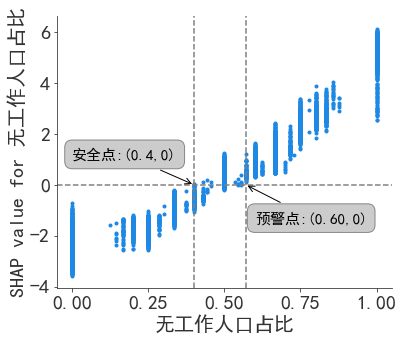

In [11]:
shap.dependence_plot('Pro_NWP', shap_values[1], data1[cols], interaction_index=None, show=False)
plt.tick_params(labelsize=20)#https://blog.csdn.net/qq_41181787/article/details/105264825
plt.xlabel('无工作人口占比',fontsize=20)
plt.ylabel('SHAP value for 无工作人口占比',fontsize=20)
# 黑色辅助线
#plt.plot([0,1 ], [0,1 ], "k--")
#plt.axhline(y=0,ls=":",c="grey")#添加水平直线
plt.axhline(y=0,ls="--",c="grey")#添加水平直线
plt.axvline(x=0.57,ls="--",c="grey")#添加垂直直线
plt.axvline(x=0.40,ls="--",c="grey")#添加垂直直线

#plt.text(0.57,0,(0.57,0),fontsize=20,style='normal',color='black')#标出坐标点坐标
#plt.text(x,y,s,family,fontsize,style,color),https://blog.csdn.net/d__yz/article/details/102469682
'''
xy：箭头的坐标
xytext： 文字的坐标
arrowprops= {
facecolor= ‘颜色’,
shrink = ‘数字’ <1 收缩箭头
}
'''
plt.annotate(s='预警点:(0.57,0)',xy=(0.57,0),xytext=(0.6,-1.5),weight='bold',color='black',fontsize=15,
 arrowprops=dict(arrowstyle='->',connectionstyle='arc3',color='black'),
 bbox=dict(boxstyle='round,pad=0.5', fc='grey', ec='k',lw=1 ,alpha=0.4))

plt.annotate(s='安全点:(0.4,0)',xy=(0.4,0),xytext=(0.0,1),weight='bold',color='black',fontsize=15,
 arrowprops=dict(arrowstyle='->',connectionstyle='arc3',color='black'),
 bbox=dict(boxstyle='round,pad=0.5', fc='grey', ec='k',lw=1 ,alpha=0.4))

plt.show()
# 抛物线与直线的交点处，标记1个黑点
#plt.plot([0,0.5], [0,0.5], 'ko')
#辅助线代码来源：https://blog.csdn.net/bangherui6508/article/details/101395349

The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


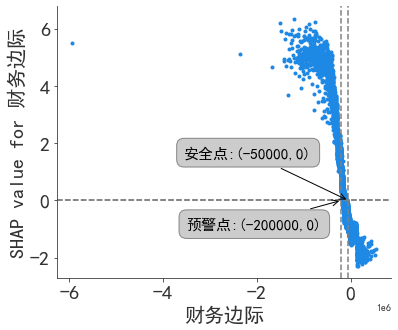

In [12]:
shap.dependence_plot('FM', shap_values[1], data1[cols], interaction_index=None, show=False)
plt.tick_params(labelsize=20)#https://blog.csdn.net/qq_41181787/article/details/105264825
plt.xlabel('财务边际',fontsize=20)
plt.ylabel('SHAP value for 财务边际',fontsize=20)
plt.axhline(y=0,ls="--",c="grey")#添加水平直线
plt.axvline(x=(-200000),ls="--",c="grey")#添加垂直直线
plt.axhline(y=0,ls="--",c="grey")#添加水平直线
plt.axvline(x=(-50000),ls="--",c="grey")#添加垂直直线

plt.annotate(s='预警点:(-200000,0)',xy=(-200000,0),xytext=(-3500000,-1),weight='bold',color='black',fontsize=15,
 arrowprops=dict(arrowstyle='->',connectionstyle='arc3',color='black'),
 bbox=dict(boxstyle='round,pad=0.5', fc='grey', ec='k',lw=1 ,alpha=0.4))

plt.annotate(s='安全点:(-50000,0)',xy=(-50000,0),xytext=(-3550000,1.5),weight='bold',color='black',fontsize=15,
 arrowprops=dict(arrowstyle='->',connectionstyle='arc3',color='black'),
 bbox=dict(boxstyle='round,pad=0.5', fc='grey', ec='k',lw=1 ,alpha=0.4))

#plt.text(-200000,0,(-200000,0),fontsize=10,style='normal',color='black')
#plt.text(-100000,0,(-100000,0),fontsize=15,style='normal',color='black')

plt.show()

The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


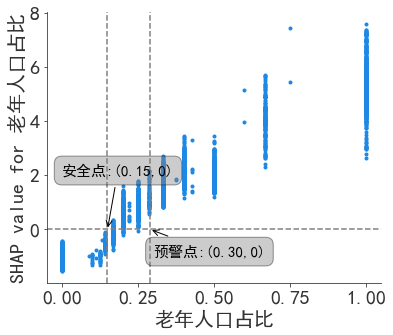

In [13]:
shap.dependence_plot('EP', shap_values[1], data1[cols], interaction_index=None, show=False)
plt.tick_params(labelsize=20)#https://blog.csdn.net/qq_41181787/article/details/105264825
plt.xlabel('老年人口占比',fontsize=20)
plt.ylabel('SHAP value for 老年人口占比',fontsize=20)
plt.axhline(y=0,ls="--",c="grey")#添加水平直线
plt.axvline(x=0.15,ls="--",c="grey")#添加垂直直线
plt.axvline(x=0.29,ls="--",c="grey")#添加垂直直线

plt.annotate(s='预警点:(0.30,0)',xy=(0.29,0),xytext=(0.3,-1),weight='bold',color='black',fontsize=15,
 arrowprops=dict(arrowstyle='->',connectionstyle='arc3',color='black'),
 bbox=dict(boxstyle='round,pad=0.5', fc='grey', ec='k',lw=1 ,alpha=0.4))

plt.annotate(s='安全点:(0.15,0)',xy=(0.15,0),xytext=(0,2),weight='bold',color='black',fontsize=15,
 arrowprops=dict(arrowstyle='->',connectionstyle='arc3',color='black'),
 bbox=dict(boxstyle='round,pad=0.5', fc='grey', ec='k',lw=1 ,alpha=0.4))

#plt.text(0.25,0,(0.25,0),fontsize=15,style='normal',color='black')
#plt.text(0.25,0,(0.25,0),fontsize=15,style='normal',color='black')


plt.show()

The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


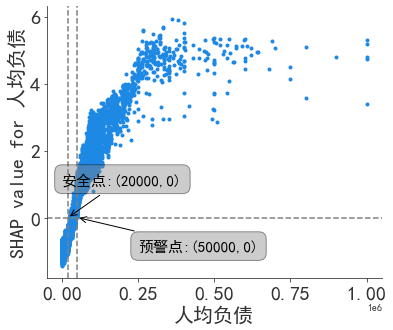

In [14]:
shap.dependence_plot('PCD', shap_values[1], data1[cols], interaction_index=None, show=False)
plt.tick_params(labelsize=20)#https://blog.csdn.net/qq_41181787/article/details/105264825
plt.xlabel('人均负债',fontsize=20)
plt.ylabel('SHAP value for 人均负债',fontsize=20)
plt.axhline(y=0,ls="--",c="grey")#添加水平直线
plt.axvline(x=50000,ls="--",c="grey")#添加垂直直线
plt.axvline(x=20000,ls="--",c="grey")#添加垂直直线
#plt.text(50000,0,(50000,0),fontsize=15,style='normal',color='black')#标出坐标点坐标
plt.annotate(s='预警点:(50000,0)',xy=(50000,0),xytext=(250000,-1),weight='bold',color='black',fontsize=15,
 arrowprops=dict(arrowstyle='->',connectionstyle='arc3',color='black'),
 bbox=dict(boxstyle='round,pad=0.5', fc='grey', ec='k',lw=1 ,alpha=0.4))

plt.annotate(s='安全点:(20000,0)',xy=(20000,0),xytext=(0.5,1),weight='bold',color='black',fontsize=15,
 arrowprops=dict(arrowstyle='->',connectionstyle='arc3',color='black'),
 bbox=dict(boxstyle='round,pad=0.5', fc='grey', ec='k',lw=1 ,alpha=0.4))

#plt.text(50000,0,(20000,0),fontsize=20,style='normal',color='black')

plt.show()

The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


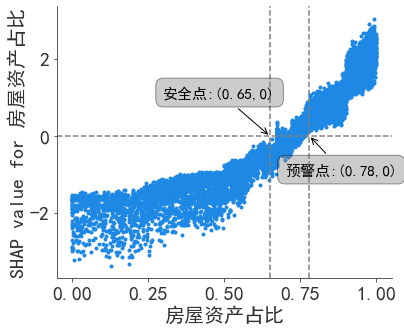

In [15]:
shap.dependence_plot('Pro_HA', shap_values[1], data1[cols], interaction_index=None, show=False)
plt.tick_params(labelsize=20)#https://blog.csdn.net/qq_41181787/article/details/105264825
plt.xlabel('房屋资产占比',fontsize=20)
plt.ylabel('SHAP value for 房屋资产占比',fontsize=20)
plt.axhline(y=0,ls="--",c="grey")#添加水平直线
plt.axvline(x=0.78,ls="--",c="grey")#添加垂直直线
plt.axvline(x=0.65,ls="--",c="grey")#添加垂直直线

plt.annotate(s='预警点:(0.78,0)',xy=(0.78,0),xytext=(0.7,-1),weight='bold',color='black',fontsize=15,
 arrowprops=dict(arrowstyle='->',connectionstyle='arc3',color='black'),
 bbox=dict(boxstyle='round,pad=0.5', fc='grey', ec='k',lw=1 ,alpha=0.4))

plt.annotate(s='安全点:(0.65,0)',xy=(0.65,0),xytext=(0.3,1),weight='bold',color='black',fontsize=15,
 arrowprops=dict(arrowstyle='->',connectionstyle='arc3',color='black'),
 bbox=dict(boxstyle='round,pad=0.5', fc='grey', ec='k',lw=1 ,alpha=0.4))

#plt.text(0.78,0,(0.78,0),fontsize=15,style='normal',color='black')
#plt.text(0.78,0,(0.65,0),fontsize=15,style='normal',color='black')

plt.show()

The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


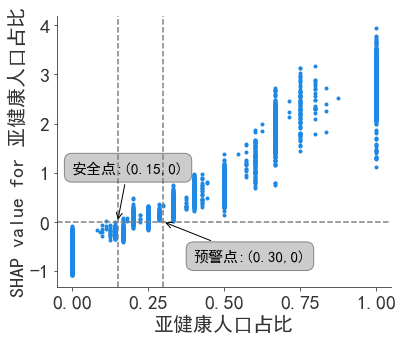

In [16]:
shap.dependence_plot('Pro_SHP', shap_values[1], data1[cols], interaction_index=None, show=False)
plt.tick_params(labelsize=20)#https://blog.csdn.net/qq_41181787/article/details/105264825
plt.xlabel('亚健康人口占比',fontsize=20)
plt.ylabel('SHAP value for 亚健康人口占比',fontsize=20)
plt.axhline(y=0,ls="--",c="grey")#添加水平直线
plt.axvline(x=0.30,ls="--",c="grey")#添加垂直直线
plt.axvline(x=0.15,ls="--",c="grey")#添加垂直直线
#plt.text(0.1,0,(0.1,0),fontsize=15,style='normal',color='black')
#plt.text(0.3,0,(0.3,0),fontsize=15,style='normal',color='black')
plt.annotate(s='预警点:(0.30,0)',xy=(0.3,0),xytext=(0.4,-0.8),weight='bold',color='black',fontsize=15,
 arrowprops=dict(arrowstyle='->',connectionstyle='arc3',color='black'),
 bbox=dict(boxstyle='round,pad=0.5', fc='grey', ec='k',lw=1 ,alpha=0.4))

plt.annotate(s='安全点:(0.15,0)',xy=(0.15,0),xytext=(0,1),weight='bold',color='black',fontsize=15,
 arrowprops=dict(arrowstyle='->',connectionstyle='arc3',color='black'),
 bbox=dict(boxstyle='round,pad=0.5', fc='grey', ec='k',lw=1 ,alpha=0.4))



plt.show()

The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


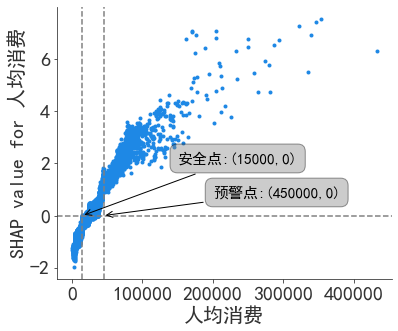

In [17]:
shap.dependence_plot('PCC', shap_values[1], data1[cols], interaction_index=None, show=False)
plt.tick_params(labelsize=20)#https://blog.csdn.net/qq_41181787/article/details/105264825
plt.xlabel('人均消费',fontsize=20)
plt.ylabel('SHAP value for 人均消费',fontsize=20)
plt.axhline(y=0,ls="--",c="grey")#添加水平直线
plt.axvline(x=45000,ls="--",c="grey")#添加垂直直线
plt.axvline(x=15000,ls="--",c="grey")#添加垂直直线

#plt.text(44000,0,(44000,0),fontsize=20,color='black')
plt.annotate(s='预警点:(450000,0)',xy=(45000,0),xytext=(200000,0.7),weight='bold',color='black',fontsize=15,
 arrowprops=dict(arrowstyle='->',connectionstyle='arc3',color='black'),
 bbox=dict(boxstyle='round,pad=0.5', fc='grey', ec='k',lw=1 ,alpha=0.4))

plt.annotate(s='安全点:(15000,0)',xy=(15000,0),xytext=(150000,2),weight='bold',color='black',fontsize=15,
 arrowprops=dict(arrowstyle='->',connectionstyle='arc3',color='black'),
 bbox=dict(boxstyle='round,pad=0.5', fc='grey', ec='k',lw=1 ,alpha=0.4))

plt.show()

The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


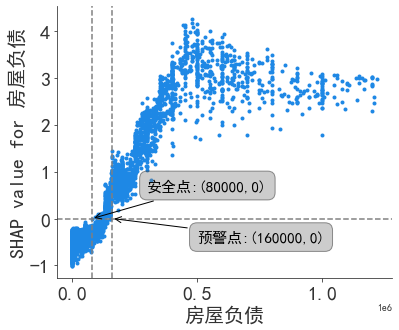

In [18]:
shap.dependence_plot('HD', shap_values[1], data1[cols], interaction_index=None, show=False)
plt.tick_params(labelsize=20)#https://blog.csdn.net/qq_41181787/article/details/105264825
plt.xlabel('房屋负债',fontsize=20)
plt.ylabel('SHAP value for 房屋负债',fontsize=20)
plt.axhline(y=0,ls="--",c="grey")#添加水平直线
plt.axvline(x=160000,ls="--",c="grey")#添加垂直直线
plt.axvline(x=80000,ls="--",c="grey")#添加垂直直线

#plt.text(160000,0,(160000,0),fontsize=15,style='normal',color='black')
#plt.annotate(s='Look',xy=(160000,0),xytext=(2,3),weight='bold',color='r',arrowprops=dict(facecolor='c',shrink=0.05))
plt.annotate(s='预警点:(160000,0)',xy=(160000,0),xytext=(500000,-0.5),weight='bold',color='black',fontsize=15,
 arrowprops=dict(arrowstyle='->',connectionstyle='arc3',color='black'),
 bbox=dict(boxstyle='round,pad=0.5', fc='grey', ec='k',lw=1 ,alpha=0.4))

plt.annotate(s='安全点:(80000,0)',xy=(80000,0),xytext=(300000,0.6),weight='bold',color='black',fontsize=15,
 arrowprops=dict(arrowstyle='->',connectionstyle='arc3',color='black'),
 bbox=dict(boxstyle='round,pad=0.5', fc='grey', ec='k',lw=1 ,alpha=0.4))

#plt.text(x,y,s,family,fontsize,style,color),https://blog.csdn.net/d__yz/article/details/102469682
#plt.grid(True)

plt.show()

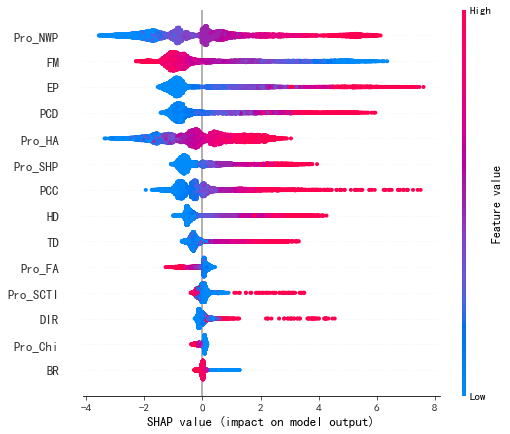

In [266]:
#对特征总体分析
plt.rcParams['axes.unicode_minus'] = False#用来显示负号
import seaborn as sns
plt.tick_params(labelsize=20)#https://blog.csdn.net/qq_41181787/article/details/105264825
shap.summary_plot(shap_values[1], data1[cols])